# Myocardial Infraction Complications Analysis

## 0. Introduction

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("MI.data", header=None)
data.columns = ["ID", "AGE", "SEX", "INF_ANAM", "STENOK_AN", "FK_STENOK", "IBS_POST", "IBS_NASL", "GB", "SIM_GIPERT", "DLIT_AG", "ZSN_A", "nr_11", "nr_01", "nr_02", "nr_03", "nr_04", "nr_07", "nr_08", "np_01", "np_04", "np_05", "np_07", "np_08", "np_09", "np_10", "endocr_01", "endocr_02", "endocr_03", "zab_leg_01", "zab_leg_02", "zab_leg_03", "zab_leg_04", "zab_leg_06", "S_AD_KBRIG", "D_AD_KBRIG", "S_AD_ORIT", "D_AD_ORIT", "O_L_POST", "K_SH_POST", "MP_TP_POST", "SVT_POST", "GT_POST", "FIB_G_POST", "ant_im", "lat_im", "inf_im", "post_im", "IM_PG_P", "ritm_ecg_p_01", "ritm_ecg_p_02", "ritm_ecg_p_04", "ritm_ecg_p_06", "ritm_ecg_p_07", "ritm_ecg_p_08", "n_r_ecg_p_01", "n_r_ecg_p_02", "n_r_ecg_p_03", "n_r_ecg_p_04", "n_r_ecg_p_05", "n_r_ecg_p_06", "n_r_ecg_p_08", "n_r_ecg_p_09", "n_r_ecg_p_10", "n_p_ecg_p_01", "n_p_ecg_p_03", "n_p_ecg_p_04", "n_p_ecg_p_05", "n_p_ecg_p_06", "n_p_ecg_p_07", "n_p_ecg_p_08", "n_p_ecg_p_09", "n_p_ecg_p_10", "n_p_ecg_p_11", "n_p_ecg_p_12", "fibr_ter_01", "fibr_ter_02", "fibr_ter_03", "fibr_ter_05", "fibr_ter_06", "fibr_ter_07", "fibr_ter_08", "GIPO_K", "K_BLOOD", "GIPER_NA", "NA_BLOOD", "ALT_BLOOD", "AST_BLOOD", "KFK_BLOOD", "L_BLOOD", "ROE", "TIME_B_S", "R_AB_1_n", "R_AB_2_n", "R_AB_3_n", "NA_KB", "NOT_NA_KB", "LID_KB", "NITR_S", "NA_R_1_n", "NA_R_2_n", "NA_R_3_n", "NOT_NA_1_n", "NOT_NA_2_n", "NOT_NA_3_n", "LID_S_n", "B_BLOK_S_n", "ANT_CA_S_n", "GEPAR_S_n", "ASP_S_n", "TIKL_S_n", "TRENT_S_n", "FIBR_PREDS", "PREDS_TAH", "JELUD_TAH", "FIBR_JELUD", "A_V_BLOK", "OTEK_LANC", "RAZRIV", "DRESSLER", "ZSN", "REC_IM", "P_IM_STEN", "LET_IS"]
data.replace("?", np.NaN, inplace=True)
data = data.apply(pd.to_numeric, errors = "coerce")
data

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


In [3]:
related_time_features = ["R_AB_1_n","R_AB_2_n", "R_AB_3_n", "NA_R_1_n", "NA_R_2_n", "NA_R_3_n", "NOT_NA_1_n","NOT_NA_2_n", "NOT_NA_3_n"]

## 1. Train-Validation-Test Split

In [4]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, 1:112]
X = X.drop(related_time_features, axis=1)
y = [data["ZSN"], data["FIBR_PREDS"], data["P_IM_STEN"], data["REC_IM"], data["OTEK_LANC"]]

X_train, X_test, y_train, y_test = [], [], [], []

# ! Caution
# i = 0 => ZSN or Chronic heart failure
# i = 1 => FIBR_PREDS or Atrial fibrillation
# i = 2 => P_IM_STEN or Post-infarction angina
# i = 3 => REC_IM or Relapse of the myocardial infarction
# i = 4 => OTEK_LANC or Pulmonary edema

for i in range(len(y)):
    # Separate train/test split for each target variable
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X, y[i], train_size=0.7, random_state=0, stratify=y[i])
    
    X_train.append(X_train_i)
    X_test.append(X_test_i)
    y_train.append(y_train_i)
    y_test.append(y_test_i)


In [5]:
# Check the number of samples in each set and print as a table
results = {"Set": ["Train", "Test"]}
for i in range(len(y)):
    results[f"y{i}"] = [len(y_train[i]), len(y_test[i])]
results = pd.DataFrame(results)
results

,Set,y0,y1,y2,y3,y4
0,Train,1190,1190,1190,1190,1190
1,Test,510,510,510,510,510


## 2. EDA

### Data Overview

In [6]:
data

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


### Target Balance Check

In [7]:
# The number of instances in the dataset
number_of_instances = len(data)
# Create a table to show the balance of each target variable
results = {"Target": [], "0": [], "1": []}
for i in range(len(y)):
    results["Target"].append(f"y{i}")
    results["0"].append(y[i].value_counts()[0] / number_of_instances)
    results["1"].append(y[i].value_counts()[1] / number_of_instances)
results = pd.DataFrame(results)
results

,Target,0,1
0,y0,0.768235,0.231765
1,y1,0.900000,0.100000
2,y2,0.912941,0.087059
3,y3,0.906471,0.093529
4,y4,0.906471,0.093529


### Check for missing values

In [8]:
# Create a table representing number of missing values of each feature, sort them descendingly
missing_values = X.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
missing_values = pd.DataFrame(missing_values, columns=["Number of Missing Values"])
missing_values

,Number of Missing Values
KFK_BLOOD,1696
IBS_NASL,1628
S_AD_KBRIG,1076
D_AD_KBRIG,1076
NOT_NA_KB,686
...,...
zab_leg_02,7
zab_leg_03,7
zab_leg_04,7
INF_ANAM,4


### Data Information of Feature

In [9]:
X.describe()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NOT_NA_KB,LID_KB,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
count,1692.000000,1700.000000,1696.000000,1594.000000,1627.000000,1649.000000,72.00000,1691.000000,1692.000000,1452.000000,...,1014.000000,1023.000000,1691.000000,1690.000000,1689.000000,1687.000000,1683.000000,1683.000000,1684.000000,1684.000000
mean,61.856974,0.626471,0.554835,2.316186,1.205286,1.160703,0.37500,1.393258,0.033688,3.340220,...,0.691321,0.387097,0.115316,0.283432,0.127294,0.666864,0.714795,0.743910,0.017815,0.202494
std,11.259936,0.483883,0.836801,2.440586,1.040814,0.801400,0.48752,1.088803,0.180478,3.098646,...,0.462176,0.487324,0.319498,0.450798,0.333401,0.471474,0.451646,0.436602,0.132317,0.401978
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.00000,2.000000,0.000000,3.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,1.00000,2.000000,0.000000,7.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,1.00000,3.000000,1.000000,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
continuous_features = ["AGE", "S_AD_ORIT", "D_AD_ORIT", "K_BLOOD", "NA_BLOOD", "ALT_BLOOD", "AST_BLOOD", "L_BLOOD", "ROE"]
binary_categorical_features = [x for x in X.columns if x not in continuous_features]

In [11]:
binary_features = []
for col in binary_categorical_features:
    if  X[col].max() == 1:
        binary_features.append(col)

In [12]:
categorical_features = [x for x in binary_categorical_features if x not in binary_features]

## 3. Preprocessing

In [13]:
unprocessed_data = X_train
%store unprocessed_data
unprocessed_data[0]

Stored 'unprocessed_data' (list)


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NOT_NA_KB,LID_KB,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
1458,66.0,1,0.0,6.0,2.0,2.0,NaN,2.0,0.0,7.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
497,56.0,1,1.0,0.0,0.0,0.0,NaN,2.0,0.0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
793,64.0,1,0.0,NaN,2.0,1.0,NaN,2.0,0.0,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
595,70.0,1,0.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1004,64.0,0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,74.0,0,0.0,NaN,2.0,1.0,NaN,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1311,63.0,1,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
317,63.0,1,0.0,6.0,2.0,1.0,NaN,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
24,67.0,1,1.0,6.0,2.0,1.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold):
        self.columns_to_drop = None
        self.threshold = threshold

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        self.columns_to_drop = X.columns[X.isnull().sum() > self.threshold]
        return self

    def transform(self, X):
        # Ensure the input is a DataFrame
        X = pd.DataFrame(X)
        global X_keep 
        X_keep = list(X.columns[~X.columns.isin(self.columns_to_drop)])
        return X.drop(columns=self.columns_to_drop)
    
class RowDropper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold):
        self.rows_to_drop = None
        self.threshold = threshold

    def fit(self, X, y=None):
        self.rows_to_drop = X.index[X.isnull().sum(axis=1) > self.threshold]
        return self

    def transform(self, X):
        # Ensure the input is a DataFrame
        X = pd.DataFrame(X)
        return X.drop(index=self.rows_to_drop)
    

In [15]:
# Define outliers handler class
class OutliersHandler(BaseEstimator, TransformerMixin):
    def __init__(self, coefficient):
        self.coefficient = coefficient
        self.lower_bounds = None
        self.upper_bounds = None

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        self.lower_bounds = q1 - iqr * self.coefficient
        self.upper_bounds = q3 + iqr * self.coefficient
        return self

    def transform(self, X):
        # Ensure the input is a DataFrame
        X = pd.DataFrame(X)
        for feature in X.columns:
            if feature in continuous_features: # if feature is continuous, because clipping in the other one will probably result in missing information
                X[feature] = X[feature].clip(self.lower_bounds[feature], self.upper_bounds[feature])
        return X

In [16]:
from sklearn.impute import KNNImputer
def impute_by_type(X, continuous_features=None, categorical_features=None, binary_features=None):
    """Fills missing values based on data type, handling potential errors, works with subsets"""
    if categorical_features is not None:
        for feature in categorical_features:
            if feature in X.columns:
                try:
                    X[feature].fillna(X[feature].mode()[0], inplace=True)
                except KeyError:
                    pass

    imputer = KNNImputer(n_neighbors=10)
    imputer.fit(X)
    X_imputed = pd.DataFrame(imputer.transform(X), columns=X.columns, index=X.index)
    if continuous_features is not None:
        for feature in continuous_features:
            if feature in X.columns:
                try:
                    temp_df = pd.DataFrame({feature: X_imputed[feature]})
                    X.update(temp_df)
                except KeyError:
                    pass
    if binary_features is not None:
        for feature in binary_features:
            if feature in X.columns:
                try:
                    temp_df = pd.DataFrame({feature: X_imputed[feature]})
                    X.update(temp_df)
                except KeyError:
                    pass
    return X

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

# Define dropper pipeline
dropper = Pipeline(steps=[
    ('column_dropper', ColumnDropper(threshold=100)),
    ('row_dropper', RowDropper(threshold=100))
])

# Define preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[
    ('dropper', dropper),
    ('outliers_clipper',OutliersHandler(coefficient=1.5)),
    ('imputation', FunctionTransformer(impute_by_type, kw_args={"continuous_features":continuous_features, "binary_features": binary_features, "categorical_features": categorical_features })),  # Fill missing values using mean/mode
    ('scaling', StandardScaler())  # Standardize features by removing the mean and scaling to unit variance
])

# Apply the preprocessing pipeline to each set
for i in range(len(y)):
    X_train[i] = preprocessing_pipeline.fit_transform(X_train[i])
    X_test[i] = preprocessing_pipeline.transform(X_test[i])

SVM_preprocessed_data = pd.DataFrame(data=X_train[0], columns=X_keep)
%store SVM_preprocessed_data
SVM_preprocessed_data

Stored 'SVM_preprocessed_data' (DataFrame)


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,ZSN_A,nr_11,...,L_BLOOD,TIME_B_S,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,0.340208,0.785397,-0.661077,1.595975,0.743926,1.015624,0.564308,-0.193621,-0.278129,-0.172978,...,1.273901,0.537529,2.652381,-0.642187,-0.375319,0.706840,0.624326,-1.679815,-0.139054,2.003428
1,-0.566373,0.785397,0.560478,-0.888818,-1.203867,-1.491829,0.564308,-0.193621,-0.278129,-0.172978,...,-1.356769,1.253432,-0.378475,-0.642187,-0.375319,-1.423706,0.624326,0.601605,-0.139054,-0.502173
2,0.158892,0.785397,-0.661077,-0.888818,0.743926,-0.238103,0.564308,-0.193621,-0.278129,-0.172978,...,1.040803,-0.178374,-0.378475,-0.642187,-0.375319,-1.423706,0.624326,0.601605,-0.139054,2.003428
3,0.702840,0.785397,-0.661077,1.595975,0.743926,-0.238103,-1.278015,-0.193621,-0.278129,-0.172978,...,-0.324481,1.611383,-0.378475,-0.642187,-0.375319,0.706840,0.624326,-1.679815,-0.139054,2.003428
4,0.158892,-1.273242,-0.661077,-0.888818,-1.203867,1.015624,0.564308,-0.193621,1.261282,-0.172978,...,-0.524279,1.253432,-0.378475,-0.642187,-0.375319,-1.423706,0.624326,-1.679815,-0.139054,-0.502173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,1.065472,-1.273242,-0.661077,-0.888818,0.743926,-0.238103,-1.278015,-0.193621,-0.278129,-0.172978,...,2.339489,-0.536326,-0.378475,-0.642187,-0.375319,-1.423706,-1.614819,-1.679815,-0.139054,2.003428
1186,0.068233,0.785397,-0.661077,-0.888818,-1.203867,-1.491829,-1.278015,-0.193621,-0.278129,-0.172978,...,-0.324481,1.253432,-0.378475,-0.642187,-0.375319,-1.423706,0.624326,0.601605,-0.139054,-0.502173
1187,0.068233,0.785397,-0.661077,1.595975,0.743926,-0.238103,-1.278015,-0.193621,1.261282,-0.172978,...,0.874305,-0.894277,-0.378475,-0.642187,-0.375319,-1.423706,0.624326,0.601605,-0.139054,2.003428
1188,0.430866,0.785397,0.560478,1.595975,0.743926,-0.238103,-1.278015,-0.193621,1.261282,-0.172978,...,0.508010,-0.894277,-0.378475,-0.642187,-0.375319,0.706840,-1.614819,0.601605,-0.139054,-0.502173


## 4. Model Selection

In [21]:
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Define the pipeline
model_pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=0)),
    ('model', SVC(random_state=0))
])

# Define the hyperparameters grid
param_grid= {
    'smote__sampling_strategy': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'model__C': [0.1, 1], 
    'model__gamma': [1, 0.1], 
    'model__kernel': ['rbf', 'linear']
}

# Define cross validation method
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Define the grid search
grid_search = GridSearchCV(model_pipeline, param_grid, scoring = 'roc_auc', cv=cv, n_jobs=-1)

# Define a list to store the best parameters
best_params = []
best_models = []

# Fit the grid search for each target variable
for i in range(len(y)):
    grid_search.fit(X_train[i], y_train[i])
    print(f"==================== Hyperparameters for y{i} ====================")
    print(f"{grid_search.best_params_}, {grid_search.best_score_}")
    # Store the parameters
    best_params.append(grid_search.best_params_)
    best_models.append(grid_search.best_estimator_)

==================== Hyperparameters for y0 ====================
{'model__C': 0.1, 'model__gamma': 1, 'model__kernel': 'linear', 'smote__sampling_strategy': 0.8}, 0.6538784484436658
==================== Hyperparameters for y1 ====================
{'model__C': 0.1, 'model__gamma': 1, 'model__kernel': 'linear', 'smote__sampling_strategy': 0.7}, 0.7126231158941441
==================== Hyperparameters for y2 ====================
{'model__C': 0.1, 'model__gamma': 0.1, 'model__kernel': 'rbf', 'smote__sampling_strategy': 0.5}, 0.6951229419578042
==================== Hyperparameters for y3 ====================
{'model__C': 1, 'model__gamma': 0.1, 'model__kernel': 'rbf', 'smote__sampling_strategy': 0.6}, 0.6244988829100979
==================== Hyperparameters for y4 ====================
{'model__C': 0.1, 'model__gamma': 1, 'model__kernel': 'linear', 'smote__sampling_strategy': 0.6}, 0.6944688316183644


## 5. Model Evaluation

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

# Create table
test_SVM = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]}


for i in range(len(y)):
    # # Set the best parameters for the model in the pipeline
    model_pipeline.set_params(**best_params[i])
    # Fit the model with the best parameters
    model_pipeline.fit(X_train[i], y_train[i])
    # Predict the target variable
    y_pred = best_models[i].predict(X_test[i])
    
    test_SVM[f"y{i}"] = [
        accuracy_score(y_test[i], y_pred),
        precision_score(y_test[i], y_pred),
        recall_score(y_test[i], y_pred),
        f1_score(y_test[i], y_pred),
        roc_auc_score(y_test[i], y_pred),
    ]
test_SVM = pd.DataFrame(test_SVM)
test_SVM.columns = ["Metric", "ZSN", "FIBR_PREDS", "P_IM_STEN", "REC_IM", "OTEK_LANC"]

test_SVM

,Metric,ZSN,FIBR_PREDS,P_IM_STEN,REC_IM,OTEK_LANC
0,Accuracy,0.701961,0.760784,0.872549,0.898039,0.827451
1,Precision,0.385135,0.196581,0.080000,0.166667,0.243590
2,Recall,0.483051,0.450980,0.045455,0.020833,0.395833
3,F1 Score,0.428571,0.273810,0.057971,0.037037,0.301587
4,ROC AUC,0.625454,0.623094,0.498049,0.505005,0.634064


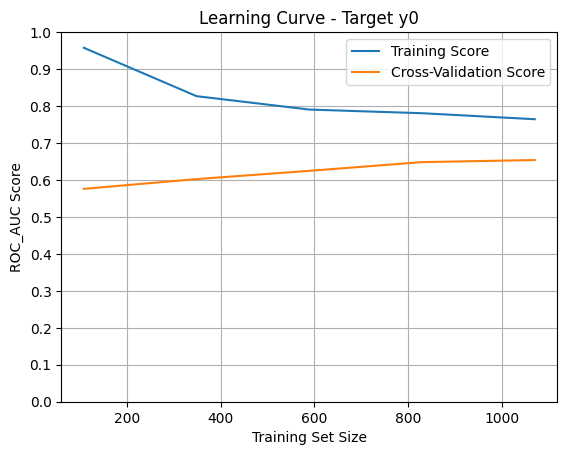

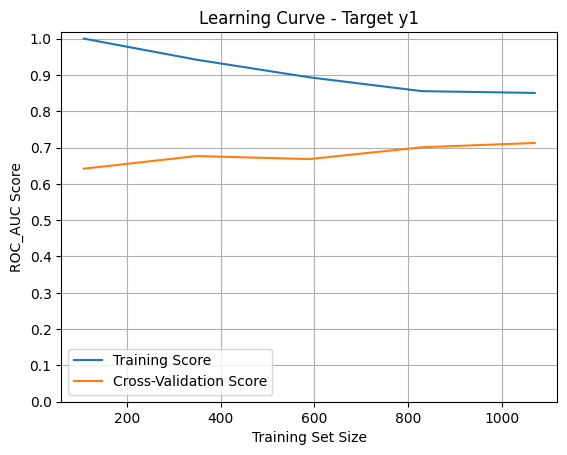

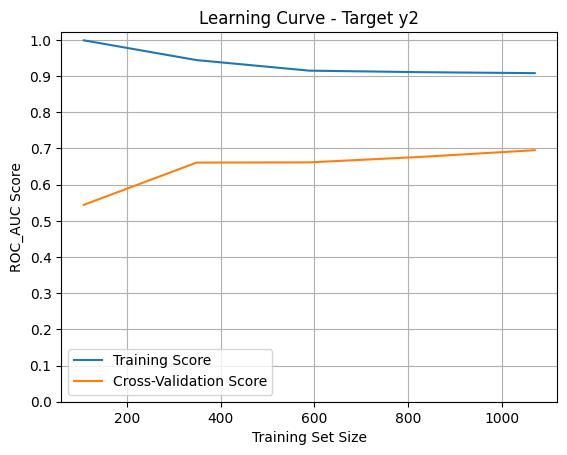

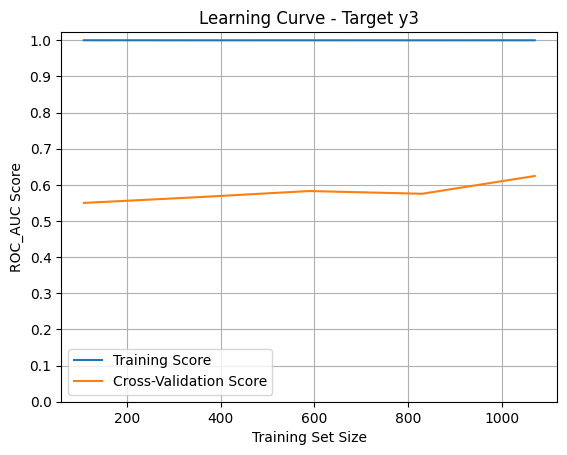

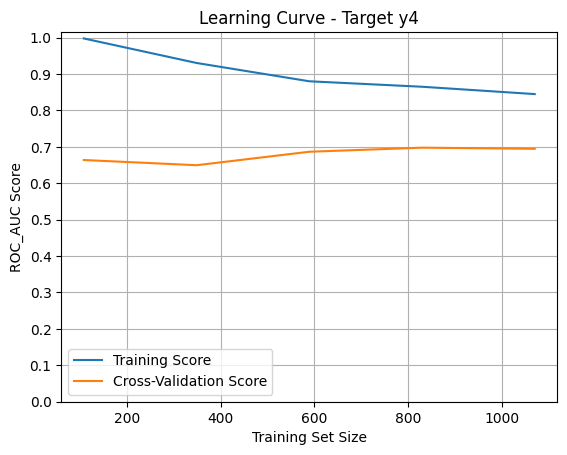

In [23]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
for i in range(len(y)):
    # Learning curve graph
    train_sizes, train_scores, test_scores = learning_curve(best_models[i], X_train[i], y_train[i], cv=cv, n_jobs=-1, scoring='roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_scores_mean, label='Training Score')
    plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.ylabel('ROC_AUC Score')
    plt.xlabel('Training Set Size')
    plt.title('Learning Curve - Target y{}'.format(i))
    plt.legend()
    plt.grid(True)
    plt.show()